In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
calls = pd.read_csv('calls.csv')
customers = pd.read_csv('customers.csv')
reason = pd.read_csv('reason.csv')
sentiment = pd.read_csv('sentiment.csv')

In [3]:
calls.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


In [4]:
customers.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [5]:
reason.head()

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [6]:
sentiment.head()

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [7]:
calls.isnull().sum()

call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
dtype: int64

In [8]:
merged_df = pd.merge(calls, sentiment, on=['call_id', 'agent_id'], how='inner')

In [9]:
merged_df

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...,calm,calm,0.05,0.34
71806,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...,calm,frustrated,0.03,0.22
71807,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...,calm,polite,0.05,0.42
71808,8332067080,8095620266,161354,8/31/2024 23:53,8/31/2024 23:59,9/1/2024 0:03,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.07,0.13


In [10]:
merged_df['agent_assigned_datetime'] = pd.to_datetime(merged_df['agent_assigned_datetime'])
merged_df['call_start_datetime'] = pd.to_datetime(merged_df['call_start_datetime'])

In [11]:
merged_df['call_end_datetime'] = pd.to_datetime(merged_df['call_end_datetime'])
merged_df['AHT'] = (merged_df['call_end_datetime'] - merged_df['agent_assigned_datetime']).dt.total_seconds()

In [12]:
merged_df['AST'] = (merged_df['agent_assigned_datetime'] - merged_df['call_start_datetime']).dt.total_seconds()

In [13]:
merged_df

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average,AHT,AST
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,neutral,angry,-0.04,0.39,1860.0,420.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.02,0.35,720.0,180.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.13,0.32,1140.0,480.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.20,0.20,420.0,300.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.05,0.35,540.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,calm,calm,0.05,0.34,1680.0,540.0
71806,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,calm,frustrated,0.03,0.22,480.0,180.0
71807,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,calm,polite,0.05,0.42,360.0,360.0
71808,8332067080,8095620266,161354,2024-08-31 23:53:00,2024-08-31 23:59:00,2024-09-01 00:03:00,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.07,0.13,240.0,360.0


In [14]:
merged_df.isnull().sum()

call_id                      0
customer_id                  0
agent_id                     0
call_start_datetime          0
agent_assigned_datetime      0
call_end_datetime            0
call_transcript              0
agent_tone                 217
customer_tone                0
average_sentiment          109
silence_percent_average      0
AHT                          0
AST                          0
dtype: int64

In [15]:
merged_df.dropna(inplace=True)

In [16]:
merged_df['call_transcript'][0]

"\n\nAgent: Thank you for calling United Airlines customer service, my name is Sarah how may I help you?\n\nCustomer: Hi, yeah I'm calling because my flight from Chicago to New York was delayed by over 3 hours! This is ridiculous, I'm missing important meetings because of this. \n\nAgent: I'm so sorry to hear about the delay, that's definitely frustrating. Umm, let me pull up your reservation and take a look at what happened. *typing sounds* Okay, it looks like there was severe weather in Chicago that caused multiple flight cancellations and delays across the board for all the airlines. Ahh shoot, yeah your original flight was scheduled to depart at 2pm but didn't actually take off until after 5pm.\n\nCustomer: Ugh this is such poor planning on United's part, you should have rerouted passengers or put us on other flights that weren't delayed. Now I've wasted a whole day. \n\nAgent: I understand your frustration sir, delays are never fun. Let me see what options I have available to help

In [17]:
merged_df = pd.merge(merged_df, reason, on=['call_id'], how='inner')

In [18]:
# data is not cleaned, there are spaces in between and '-', converting it all in lower case
merged_df['primary_call_reason'] = merged_df['primary_call_reason'].str.replace('-', ' ').str.strip().str.lower().str.replace(r'\s+', ' ', regex=True)
# Round average sentiments to one decimal place
merged_df['average_sentiment'] = merged_df['average_sentiment'].round(1)

In [19]:
merged_df

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average,AHT,AST,primary_call_reason
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,neutral,angry,-0.0,0.39,1860.0,420.0,voluntary cancel
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.0,0.35,720.0,180.0,booking
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.1,0.32,1140.0,480.0,irrops
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.2,0.20,420.0,300.0,upgrade
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.0,0.35,540.0,600.0,seating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66450,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.2,0.51,600.0,360.0,mileage plus
66451,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,calm,calm,0.0,0.34,1680.0,540.0,post flight
66452,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,calm,frustrated,0.0,0.22,480.0,180.0,upgrade
66453,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,calm,polite,0.0,0.42,360.0,360.0,upgrade


In [20]:
merged_df.isnull().sum()

call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
agent_tone                 0
customer_tone              0
average_sentiment          0
silence_percent_average    0
AHT                        0
AST                        0
primary_call_reason        0
dtype: int64

In [21]:
total_call = merged_df.shape[0]

In [22]:
merged_df

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average,AHT,AST,primary_call_reason
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,neutral,angry,-0.0,0.39,1860.0,420.0,voluntary cancel
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.0,0.35,720.0,180.0,booking
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.1,0.32,1140.0,480.0,irrops
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.2,0.20,420.0,300.0,upgrade
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.0,0.35,540.0,600.0,seating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66450,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.2,0.51,600.0,360.0,mileage plus
66451,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,calm,calm,0.0,0.34,1680.0,540.0,post flight
66452,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,calm,frustrated,0.0,0.22,480.0,180.0,upgrade
66453,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,calm,polite,0.0,0.42,360.0,360.0,upgrade


In [23]:
# calculating the number of unique reasons and what is the most affected reason
reason_counts = merged_df['primary_call_reason'].value_counts()
print(reason_counts)

irrops                   13264
voluntary change         10827
seating                   6355
mileage plus              5837
post flight               4309
communications            3836
products and services     2848
baggage                   2808
upgrade                   2734
booking                   2624
check in                  1899
checkout                  1882
voluntary cancel          1603
digital support           1220
etc                        950
traveler updates           932
other topics               816
schedule change            730
products & services        475
disability                 402
unaccompanied minor        104
Name: primary_call_reason, dtype: int64


In [24]:
# reading transcript of top 5 reasons to understand what is going on
merged_df[merged_df['primary_call_reason']  == 'post flight']

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average,AHT,AST,primary_call_reason
12,7892954313,385356591,519057,2024-08-01 00:27:00,2024-08-01 00:37:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,calm,angry,0.3,0.22,180.0,600.0,post flight
15,9009313118,1937394483,963118,2024-08-01 00:38:00,2024-08-01 00:47:00,2024-08-01 01:31:00,\n\nAgent: Thank you for calling United Airlin...,neutral,angry,-0.0,0.33,2640.0,540.0,post flight
19,7310794085,8111523184,957331,2024-08-01 00:46:00,2024-08-01 00:55:00,2024-08-01 01:12:00,\n\nAgent: Thank you for calling United Airlin...,calm,frustrated,0.1,0.72,1020.0,540.0,post flight
22,1093484785,6019050225,817160,2024-08-01 01:04:00,2024-08-01 01:13:00,2024-08-01 01:27:00,\n\nAgent: Thank you for calling United Airlin...,calm,polite,0.1,0.37,840.0,540.0,post flight
37,2200682864,1021848050,963118,2024-08-01 01:52:00,2024-08-01 02:01:00,2024-08-01 02:28:00,\n\nAgent: Thank you for calling United Airlin...,neutral,calm,-0.1,0.42,1620.0,540.0,post flight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66385,8052063422,4687203942,824457,2024-08-31 22:43:00,2024-08-31 22:53:00,2024-08-31 23:09:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.1,0.10,960.0,600.0,post flight
66406,9074995227,2224551129,281512,2024-08-31 23:03:00,2024-08-31 23:13:00,2024-08-31 23:37:00,\n\nAgent: Thank you for calling United Airlin...,neutral,angry,-0.1,0.15,1440.0,600.0,post flight
66422,4160039295,2236479518,413148,2024-08-31 23:16:00,2024-08-31 23:25:00,2024-08-31 23:47:00,\n\nAgent: Thank you for calling United Airlin...,neutral,angry,-0.2,0.23,1320.0,540.0,post flight
66431,5713760779,3306855958,102574,2024-08-31 23:29:00,2024-08-31 23:38:00,2024-09-01 01:33:00,\n\nAgent: Thank you for calling United Airlin...,calm,frustrated,0.0,0.39,6900.0,540.0,post flight


In [25]:
merged_df['call_transcript'][12]

"\n\nAgent: Thank you for calling United Airlines, my name is Steve. How may I help you today?\n\nCustomer: Hi, yeah I'm calling because I have a flight booked from Chicago to LA next Wednesday and I'm having some issues with it. \n\nAgent: Okay, no problem. What seems to be the issue with your flight?\n\nCustomer: Well when I logged into the app to check my booking, the flight doesn't show up anymore. I got an email a few days ago saying there was a schedule change but it didn't give me any new details. \n\nAgent: I see, thanks for providing those details. Let me take a look at your reservation here... *typing noises* alright, it looks like your flight was rescheduled due to a maintenance issue with the aircraft. The new departure time is 2 hours later, leaving at 11am instead of 9am. Does that flight time still work for your travel plans?\n\nCustomer: Not really no, that really messes things up for me. Is there any way I can get on an earlier flight or get a full refund since you guy

In [26]:
merged_df[merged_df['primary_call_reason']  == 'mileage plus']

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average,AHT,AST,primary_call_reason
5,5297766997,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,calm,calm,0.1,0.11,1440.0,300.0,mileage plus
7,8902603117,7974326984,488324,2024-08-01 00:13:00,2024-08-01 00:21:00,2024-08-01 00:29:00,\n\nAgent: Thank you for calling United Airlin...,calm,angry,0.1,0.35,480.0,480.0,mileage plus
8,7222687732,8023417234,957331,2024-08-01 00:14:00,2024-08-01 00:22:00,2024-08-01 00:35:00,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.1,0.54,780.0,480.0,mileage plus
27,8607543793,5473943611,158319,2024-08-01 01:16:00,2024-08-01 01:23:00,2024-08-01 01:46:00,\n\nAgent: Thank you for calling United Airlin...,calm,polite,0.0,0.29,1380.0,420.0,mileage plus
32,3107888571,6813371451,519057,2024-08-01 01:37:00,2024-08-01 01:43:00,2024-08-01 02:21:00,\n\nAgent: Thank you for calling United Airlin...,neutral,calm,-0.2,0.63,2280.0,360.0,mileage plus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66348,9285880489,4033697310,901733,2024-08-31 22:11:00,2024-08-31 22:19:00,2024-08-31 22:21:00,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,0.0,0.18,120.0,480.0,mileage plus
66353,8165733829,3745169644,853776,2024-08-31 22:12:00,2024-08-31 22:20:00,2024-08-31 22:34:00,\n\nAgent: Thank you for calling United Airlin...,neutral,neutral,-0.0,0.08,840.0,480.0,mileage plus
66357,2230380282,9263414419,677860,2024-08-31 22:19:00,2024-08-31 22:24:00,2024-08-31 22:28:00,\n\nAgent: Thank you for calling United Airlin...,neutral,calm,-0.1,0.11,240.0,300.0,mileage plus
66389,2143306712,9368405285,175271,2024-08-31 22:51:00,2024-08-31 22:58:00,2024-08-31 22:59:00,\n\nAgent: Thank you for calling United Airlin...,frustrated,polite,-0.3,0.00,60.0,420.0,mileage plus


In [27]:
merged_df['call_transcript'][0]

"\n\nAgent: Thank you for calling United Airlines customer service, my name is Sarah how may I help you?\n\nCustomer: Hi, yeah I'm calling because my flight from Chicago to New York was delayed by over 3 hours! This is ridiculous, I'm missing important meetings because of this. \n\nAgent: I'm so sorry to hear about the delay, that's definitely frustrating. Umm, let me pull up your reservation and take a look at what happened. *typing sounds* Okay, it looks like there was severe weather in Chicago that caused multiple flight cancellations and delays across the board for all the airlines. Ahh shoot, yeah your original flight was scheduled to depart at 2pm but didn't actually take off until after 5pm.\n\nCustomer: Ugh this is such poor planning on United's part, you should have rerouted passengers or put us on other flights that weren't delayed. Now I've wasted a whole day. \n\nAgent: I understand your frustration sir, delays are never fun. Let me see what options I have available to help

In [28]:
# Now calculating the busiest time of the day
merged_df['call_hour'] = merged_df['call_start_datetime'].dt.hour
busiest_time = merged_df['call_hour'].value_counts()
print(busiest_time)

9     4914
12    4898
17    4871
11    4860
16    4857
14    4826
15    4807
8     4806
10    4797
13    4766
18    4323
7     1471
0     1063
20    1050
22    1044
1     1041
23    1037
19    1029
21    1027
5     1024
6     1006
3      995
4      980
2      963
Name: call_hour, dtype: int64


In [29]:
# busiest time is 8AM to 6PM time hours, we can strengthen our team force at this time and reduce the  team strength for remaining time
# it is approx 4-5 times busier so we can take 50% of our team to work on 8AM to 6PM


In [30]:
merged_df.isnull().sum()

call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
agent_tone                 0
customer_tone              0
average_sentiment          0
silence_percent_average    0
AHT                        0
AST                        0
primary_call_reason        0
call_hour                  0
dtype: int64

In [31]:
merged_df = pd.merge(merged_df, customers, on=['customer_id'], how='inner')

In [32]:
merged_df.drop(columns=['customer_name'], inplace=True)

In [33]:
merged_df

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average,AHT,AST,primary_call_reason,call_hour,elite_level_code
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,neutral,angry,-0.0,0.39,1860.0,420.0,voluntary cancel,23,4.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.0,0.35,720.0,180.0,booking,0,NaN
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.1,0.32,1140.0,480.0,irrops,23,NaN
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.2,0.20,420.0,300.0,upgrade,0,2.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.0,0.35,540.0,600.0,seating,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66450,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.2,0.51,600.0,360.0,mileage plus,23,2.0
66451,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,calm,calm,0.0,0.34,1680.0,540.0,post flight,23,NaN
66452,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,calm,frustrated,0.0,0.22,480.0,180.0,upgrade,23,1.0
66453,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,calm,polite,0.0,0.42,360.0,360.0,upgrade,23,NaN


In [34]:
merged_df.isnull().sum()

call_id                        0
customer_id                    0
agent_id                       0
call_start_datetime            0
agent_assigned_datetime        0
call_end_datetime              0
call_transcript                0
agent_tone                     0
customer_tone                  0
average_sentiment              0
silence_percent_average        0
AHT                            0
AST                            0
primary_call_reason            0
call_hour                      0
elite_level_code           23876
dtype: int64

In [35]:
# In elite_level_code we can replace NaN values with a 0 because there are 23876 NaN entries and 
# this is customer loyalty and how important is the customer rating
merged_df['elite_level_code'].fillna(0, inplace=True)

In [36]:
# now lets catagorize long AST and AHT by taking average
# considering higher than average is a long AST/AHT
average_AST = merged_df['AST'].mean()
average_AHT = merged_df['AHT'].mean()
print('average AST: ', average_AST)
print('average AHT: ', average_AHT)

average AST:  436.94680610939736
average AHT:  698.315852832744


In [37]:
merged_df['AST_Category'] = merged_df['AST'].apply(lambda x: 'Long' if x > average_AST else 'Normal')
merged_df['AHT_Category'] = merged_df['AHT'].apply(lambda x: 'Long' if x > average_AHT else 'Normal')

In [38]:
merged_df

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average,AHT,AST,primary_call_reason,call_hour,elite_level_code,AST_Category,AHT_Category
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,neutral,angry,-0.0,0.39,1860.0,420.0,voluntary cancel,23,4.0,Normal,Long
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.0,0.35,720.0,180.0,booking,0,0.0,Normal,Long
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.1,0.32,1140.0,480.0,irrops,23,0.0,Long,Long
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.2,0.20,420.0,300.0,upgrade,0,2.0,Normal,Normal
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.0,0.35,540.0,600.0,seating,0,0.0,Long,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66450,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.2,0.51,600.0,360.0,mileage plus,23,2.0,Normal,Normal
66451,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,calm,calm,0.0,0.34,1680.0,540.0,post flight,23,0.0,Long,Long
66452,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,calm,frustrated,0.0,0.22,480.0,180.0,upgrade,23,1.0,Normal,Normal
66453,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,calm,polite,0.0,0.42,360.0,360.0,upgrade,23,0.0,Normal,Normal


In [39]:
# how many long AHT are there with different reasons?
long_ast_df = merged_df[merged_df['AST_Category'] == 'Long']
call_reason_counts = long_ast_df['primary_call_reason'].value_counts().reset_index()
print(call_reason_counts)

                  index  primary_call_reason
0      voluntary change                 8662
1               seating                 6355
2           post flight                 4309
3                irrops                 2648
4               baggage                 2228
5              checkout                 1882
6      voluntary cancel                 1280
7          mileage plus                 1193
8      traveler updates                  932
9       digital support                  871
10                  etc                  790
11             check in                  370
12           disability                  288
13  unaccompanied minor                  104


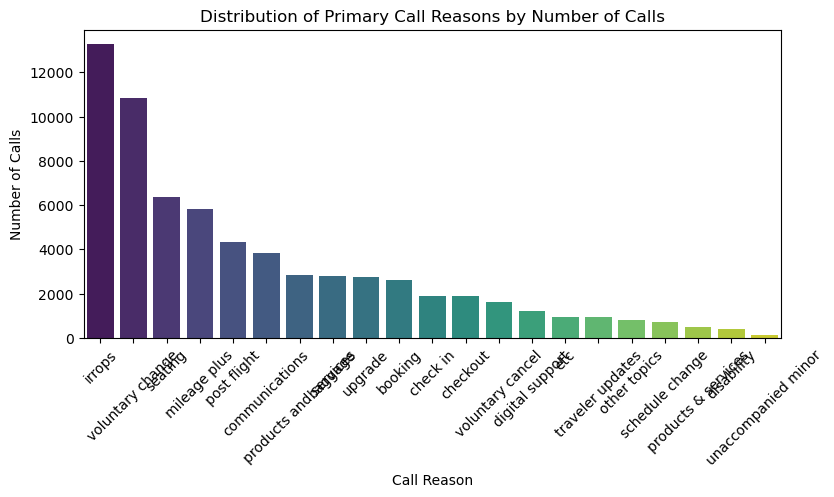

In [64]:
# now plotting graphs and limiting it to top 15 reasons
top_15_reasons = reason_counts.index
plt.figure(figsize=(9, 4))
sns.countplot(data=merged_df[merged_df['primary_call_reason'].isin(top_15_reasons)],
               x='primary_call_reason', order=top_15_reasons, palette='viridis')
plt.title('Distribution of Primary Call Reasons by Number of Calls')
plt.xticks(rotation=45)
plt.xlabel('Call Reason')
plt.ylabel('Number of Calls')
plt.show()

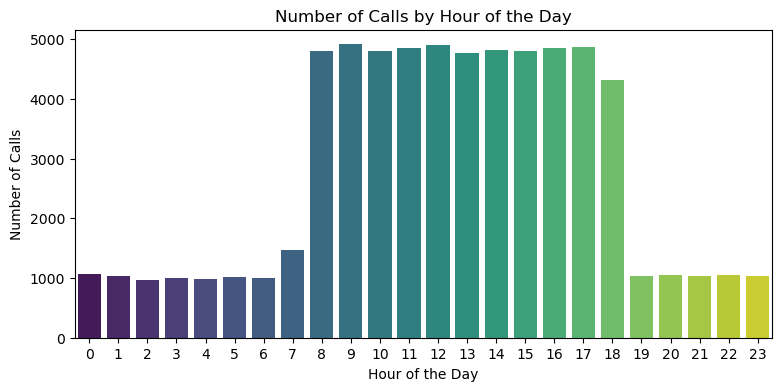

In [65]:
# Busiest Times of the Day
plt.figure(figsize=(9, 4))
sns.countplot(data=merged_df[merged_df['primary_call_reason'].isin(top_15_reasons)],
               x='call_hour', palette='viridis')
plt.title('Number of Calls by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.xticks(range(24))
plt.show()

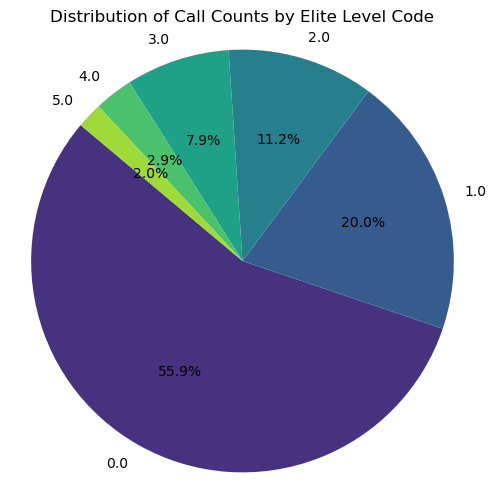

In [68]:
# Calculating number of people corresponding to their elite code
count_by_elite = merged_df['elite_level_code'].value_counts().reset_index()
count_by_elite.columns = ['elite_level_code', 'count']  # Rename columns for clarity

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(count_by_elite['count'], labels=count_by_elite['elite_level_code'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(count_by_elite)))
plt.title('Distribution of Call Counts by Elite Level Code')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

   elite_level_code         AHT
5               5.0  899.631336
4               4.0  773.969388
3               3.0  730.189753
2               2.0  725.751880
1               1.0  687.642374
0               0.0  681.077896


Text(0.5, 1.0, 'Average Handle Time by Elite Level Code')

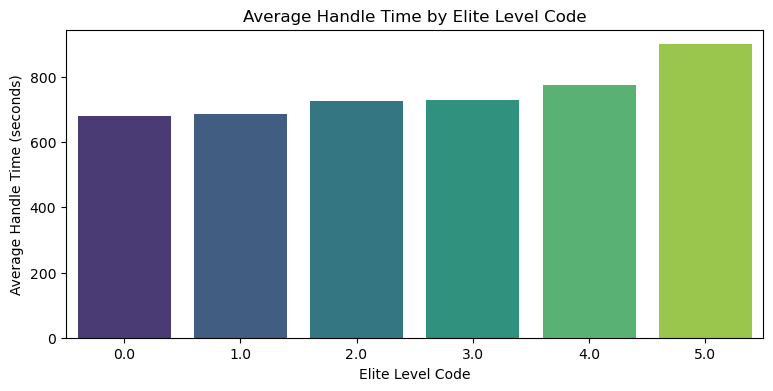

In [67]:
average_aht_by_elite_level_code = merged_df.groupby('elite_level_code')['AHT'].mean().reset_index()
average_aht_by_elite_level_code = average_aht_by_elite_level_code.sort_values(by='AHT', ascending=False)
print(average_aht_by_elite_level_code)

# Plotting
plt.figure(figsize=(9, 4))
sns.barplot(x='elite_level_code', y='AHT', data=average_aht_by_elite_level_code, palette='viridis')

# Add labels and title
plt.xlabel('Elite Level Code')
plt.ylabel('Average Handle Time (seconds)')
plt.title('Average Handle Time by Elite Level Code')

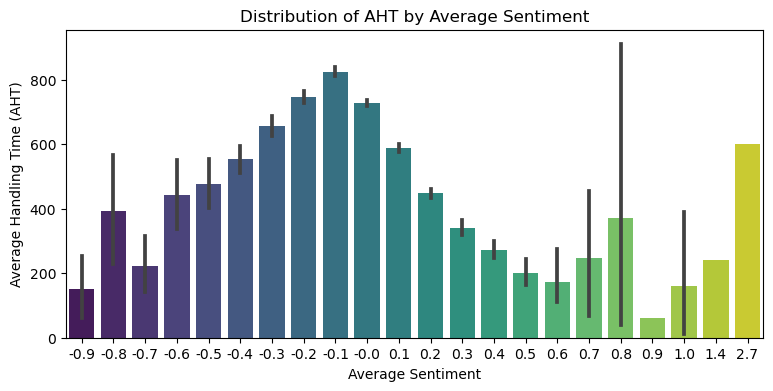

In [69]:
# Box plot to analyze the distribution of AHT against average_sentiment
plt.figure(figsize=(9, 4))
sns.barplot(data=merged_df, x='average_sentiment', y='AHT', palette='viridis')
plt.title('Distribution of AHT by Average Sentiment')
plt.xlabel('Average Sentiment')
plt.ylabel('Average Handling Time (AHT)')
plt.show()


In [45]:
# Group by primary_call_reason and calculate the average Handle Time
average_aht_by_reason = merged_df.groupby('primary_call_reason')['AHT'].mean().reset_index()

# Sort the data by average_handle_time_seconds to make the plot more readable
average_aht_by_reason = average_aht_by_reason.sort_values(by='AHT', ascending=False)

print(average_aht_by_reason)

      primary_call_reason          AHT
3                checkout  1019.649309
9            mileage plus   997.097824
7                     etc   964.673684
11            post flight   935.674170
4          communications   827.299270
8                  irrops   786.636007
13  products and services   751.832865
19       voluntary cancel   722.994386
12    products & services   721.642105
20       voluntary change   639.346079
18                upgrade   633.094367
2                check in   575.323855
17    unaccompanied minor   519.230769
14        schedule change   490.602740
15                seating   475.213218
1                 booking   429.032012
16       traveler updates   389.806867
5         digital support   373.327869
10           other topics   350.147059
0                 baggage   335.961538
6              disability   292.238806


Text(0.5, 1.0, 'Average Handle Time by Primary\xa0Call\xa0Reason')

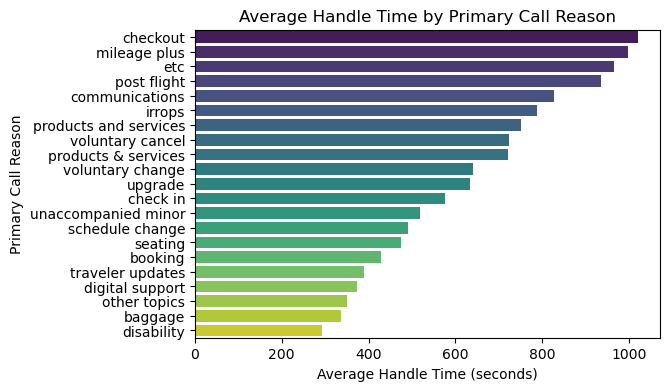

In [72]:
# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x='AHT', y='primary_call_reason', data=average_aht_by_reason, palette='viridis')

# Add labels and title
plt.xlabel('Average Handle Time (seconds)')
plt.ylabel('Primary Call Reason')
plt.title('Average Handle Time by Primary Call Reason')

In [48]:
average_aht_by_agent_tone = merged_df.groupby('agent_tone')['AHT'].mean().reset_index()
average_aht_by_agent_tone = average_aht_by_agent_tone.sort_values(by='AHT', ascending=False)
print(average_aht_by_agent_tone)


   agent_tone         AHT
3     neutral  749.863939
1        calm  627.314920
2  frustrated  619.930192
0       angry  389.016393
4      polite  222.962963


Text(0.5, 1.0, 'AHT by Handling Tone')

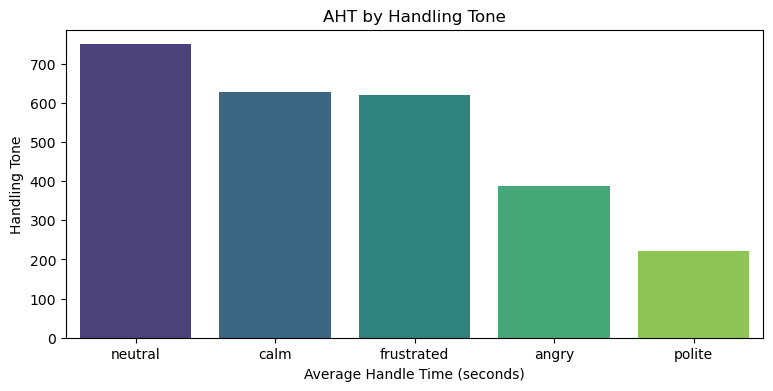

In [71]:
# Plotting
plt.figure(figsize=(9, 4))
sns.barplot(x='agent_tone', y='AHT', data=average_aht_by_agent_tone, palette='viridis')

# Add labels and title
plt.xlabel('Average Handle Time (seconds)')
plt.ylabel('Handling Tone')
plt.title('AHT by Handling Tone')

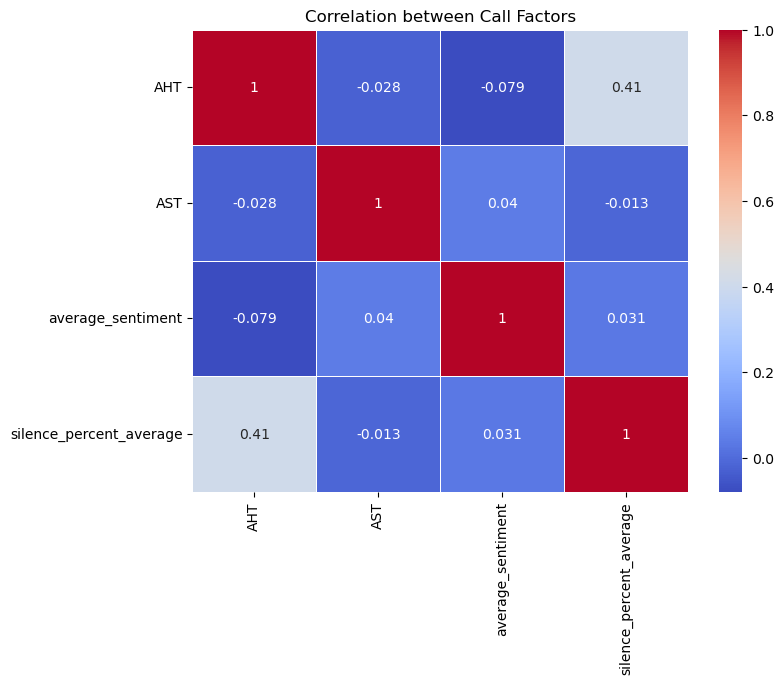

In [50]:
# 5. Heatmap: Correlation between factors (handle time, waiting time, sentiment)
plt.figure(figsize=(8, 6))
corr = merged_df[['AHT', 'AST', 'average_sentiment', 'silence_percent_average']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Call Factors')
plt.show()

In [54]:
# percentage difference between the average handling time for the most frequent and least frequent call reasons
reason_counts = merged_df['primary_call_reason'].value_counts()
most_frequent_reason = reason_counts.idxmax()
least_frequent_reason = reason_counts.idxmin()
average_aht_most_frequent = merged_df[merged_df['primary_call_reason'] == most_frequent_reason]['AHT'].mean()
average_aht_least_frequent = merged_df[merged_df['primary_call_reason'] == least_frequent_reason]['AHT'].mean()
percentage_difference = ((average_aht_most_frequent - average_aht_least_frequent) / average_aht_least_frequent) * 100
print(f'Most Frequent Call Reason: {most_frequent_reason}, Average AHT: {average_aht_most_frequent}')
print(f'Least Frequent Call Reason: {least_frequent_reason}, Average AHT: {average_aht_least_frequent}')
print(f'Percentage Difference in AHT: {percentage_difference:.2f}%')

Most Frequent Call Reason: irrops, Average AHT: 786.6360072376357
Least Frequent Call Reason: unaccompanied minor, Average AHT: 519.2307692307693
Percentage Difference in AHT: 51.50%


In [52]:
unique_reasons = merged_df['primary_call_reason'].unique()
print(unique_reasons) 

['voluntary cancel' 'booking' 'irrops' 'upgrade' 'seating' 'mileage plus'
 'checkout' 'voluntary change' 'post flight' 'check in' 'other topics'
 'communications' 'schedule change' 'products & services'
 'digital support' 'disability' 'unaccompanied minor' 'baggage'
 'traveler updates' 'etc' 'products and services']


In [53]:
merged_df.to_csv('output_file.csv', index=False)